# Chapter 11 Time Series

Time series data is a data set where instances are indexed by time. It is an important form of structured data in many fields such as finance, economics, ecology, neuroscience, and physics. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Date and Time Data Types and Tools

In Python, the `datetime.datetime` class is widely used to represent date and time data.

In [2]:
from datetime import datetime

datetime.now()

datetime.datetime(2020, 1, 12, 20, 35, 58, 434986)

In [3]:
datetime.now().year

2020

In [4]:
datetime.now().day

12

In [5]:
datetime.now().month

1

We can use `datetime.timedelta` to represent the temporal difference between two `datetime` objects.

In [6]:
from datetime import timedelta

delta = timedelta(10)

datetime.now() + delta

datetime.datetime(2020, 1, 22, 20, 35, 58, 471951)

In [7]:
date1 = datetime(2019, 12, 12)
date2 = datetime.now()
date1 - date2

datetime.timedelta(days=-32, seconds=12241, microseconds=520065)

**Convert between string and datetime**

In [8]:
# datetime to string
date = datetime(2011, 1, 3, 23, 30, 45)
str(date)

'2011-01-03 23:30:45'

In [9]:
# Convert to format "YYYY-MM-DD"
date.strftime("%Y/%m/%d %H:%M, %A")

'2011/01/03 23:30, Monday'

Datetime formats:
- %Y: Four-digit year
- %y: Two-digit year
- %m: Two-digit month
- %d: Two-digit day
- %H: Hour 0 - 23
- %I: Hour 1 - 12
- %M: Two-digit minute
- %S: Second
- %w: Weekday

[More on this](https://docs.python.org/2/library/datetime.html)

In [10]:
# Exercise: convert date to "01/03/2011"
date = datetime(2011, 1, 3)
date.strftime("%m/%d/%Y") # the formats are case-sensitive

'01/03/2011'

In [11]:
# Exercise: convert date to "01-03-2011 00:00"
date.strftime("%m-%d-%Y %H:%M")

'01-03-2011 00:00'

In [12]:
# String to datetime
from dateutil.parser import parse
parse("2011-01-03").second

0

In [13]:
parse("Jan 31, 1997 10:45 PM")

datetime.datetime(1997, 1, 31, 22, 45)

In [14]:
# Many countries use format "DD/MM/YYYY". We need to set dayfirst=True
# so that the date is correctly recognized.
parse("06/12/2011", dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [15]:
parse("06/12/2011")

datetime.datetime(2011, 6, 12, 0, 0)

## 2. Time Series Basics

In [16]:
# Create a list of datetime objects
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 2, 7), datetime(2011, 2, 8),
         datetime(2011, 3, 10), datetime(2011, 3, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02    0.210633
2011-01-05    0.758696
2011-02-07   -1.781798
2011-02-08   -0.479869
2011-03-10    0.273747
2011-03-12   -0.283933
dtype: float64

In [17]:
# Select 01/05
ts['2011-01-05']

0.7586964742944254

In [18]:
ts[1]

0.7586964742944254

In [19]:
ts['01/05/2011']

0.7586964742944254

In [20]:
ts['20110105']

0.7586964742944254

In [21]:
# Select a range of dates
ts['2011-02']

2011-02-07   -1.781798
2011-02-08   -0.479869
dtype: float64

In [22]:
ts['2011-02-01':'2011-02-8'] # the end datetime is also included

2011-02-07   -1.781798
2011-02-08   -0.479869
dtype: float64

In [23]:
ts['2011-02-01':]

2011-02-07   -1.781798
2011-02-08   -0.479869
2011-03-10    0.273747
2011-03-12   -0.283933
dtype: float64

In [24]:
ts[:"2011-03-10"]

2011-01-02    0.210633
2011-01-05    0.758696
2011-02-07   -1.781798
2011-02-08   -0.479869
2011-03-10    0.273747
dtype: float64

## 3. Date Ranges

In [25]:
# manually populate a list of dates
dates = [datetime(2011, 1, 2), datetime(2011, 3, 10), datetime(2011, 4, 1)]
ts[dates]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:1152: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


2011-01-02    0.210633
2011-03-10    0.273747
2011-04-01         NaN
dtype: float64

In [26]:
# Create a range of dates
daterange = pd.date_range('2011-01-01', periods=8)
print(daterange)

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08'],
              dtype='datetime64[ns]', freq='D')


In [27]:
daterange = pd.date_range('2011-01-01', periods=5, freq='2D')
print(daterange)

DatetimeIndex(['2011-01-01', '2011-01-03', '2011-01-05', '2011-01-07',
               '2011-01-09'],
              dtype='datetime64[ns]', freq='2D')


In [28]:
daterange = pd.date_range("2011-01-01", periods=5, freq="10H")
print(daterange)

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 10:00:00',
               '2011-01-01 20:00:00', '2011-01-02 06:00:00',
               '2011-01-02 16:00:00'],
              dtype='datetime64[ns]', freq='10H')


In [29]:
# Sample business days only
daterange = pd.date_range("2011-01-01", periods=10, freq="B")
print(daterange)

DatetimeIndex(['2011-01-03', '2011-01-04', '2011-01-05', '2011-01-06',
               '2011-01-07', '2011-01-10', '2011-01-11', '2011-01-12',
               '2011-01-13', '2011-01-14'],
              dtype='datetime64[ns]', freq='B')


In [30]:
ts[daterange]

2011-01-03         NaN
2011-01-04         NaN
2011-01-05    0.758696
2011-01-06         NaN
2011-01-07         NaN
2011-01-10         NaN
2011-01-11         NaN
2011-01-12         NaN
2011-01-13         NaN
2011-01-14         NaN
Freq: B, dtype: float64

In [31]:
ts[ts.index.isin(daterange)]

2011-01-05    0.758696
dtype: float64

## 4. Shifting Data


In [32]:
prices = pd.DataFrame(np.random.rand(4) + 100,
                      index=pd.date_range('2019-11-01', periods=4),
                      columns=['Price'])
prices

,Price
2019-11-01,100.092654
2019-11-02,100.526113
2019-11-03,100.135734
2019-11-04,100.830653


In [33]:
prices - 100

,Price
2019-11-01,0.092654
2019-11-02,0.526113
2019-11-03,0.135734
2019-11-04,0.830653


In [34]:
# How to create a column storing yesterday's price?
for date in prices.index:
    yesterday = date - timedelta(days=1)
    if yesterday in prices.index:
#         print(prices.loc[yesterday])
        prices.loc[date, "Yesterday's Price"] = prices.loc[yesterday, "Price"]
prices

,Price,Yesterday's Price
2019-11-01,100.092654,NaN
2019-11-02,100.526113,100.092654
2019-11-03,100.135734,100.526113
2019-11-04,100.830653,100.135734


In [35]:
prices = pd.DataFrame(np.random.rand(4) + 100,
                      index=pd.date_range('2019-11-01', periods=4),
                      columns=['Price'])
prices_yesterday = prices.shift(1)
prices_yesterday

,Price
2019-11-01,NaN
2019-11-02,100.215663
2019-11-03,100.658554
2019-11-04,100.394731


In [36]:
prices = pd.merge(prices, prices_yesterday, left_index=True, right_index=True,
                  suffixes=["Today", "Yesterday"])
prices

,PriceToday,PriceYesterday
2019-11-01,100.215663,NaN
2019-11-02,100.658554,100.215663
2019-11-03,100.394731,100.658554
2019-11-04,100.071026,100.394731


In [37]:
# Exercise: Compute the percent changes between yesterday and today's price
# Formula: percent = (today's price - yesterday's price) / yesterday's price
prices['PercentOfChange'] = (prices['PriceToday'] - prices['PriceYesterday']) \
                            / prices['PriceYesterday']
prices

,PriceToday,PriceYesterday,PercentOfChange
2019-11-01,100.215663,NaN,NaN
2019-11-02,100.658554,100.215663,0.004419
2019-11-03,100.394731,100.658554,-0.002621
2019-11-04,100.071026,100.394731,-0.003224


## Analyzing Stock Prices

In [38]:
# Install pandas-datareader to download data
# https://pydata.github.io/pandas-datareader/devel/remote_data.html#tiingo
!python -m pip install --upgrade pip
!pip install pandas-datareader

  Using cached https://files.pythonhosted.org/packages/00/b6/9cfa56b4081ad13874b0c6f96af8ce16cfbc1cb06bedf8e9164ce5551ec1/pip-19.3.1-py2.py3-none-any.whl
  Found existing installation: pip 19.2.3
    Uninstalling pip-19.2.3:


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\pip\\_internal\\build_env.py'
Consider using the `--user` option or check the permissions.



In [39]:
import os
import pandas_datareader as pdr
api_key = "1add15c49f55eca6cfdce0109f11c6d477974b14"
# api_key = "Find-your-key-on-tiingo"
df = pdr.get_data_tiingo('GOOG', api_key=api_key)
df.head()

close    high      low    open   volume  \
symbol date                                                                  
GOOG   2015-01-13 00:00:00+00:00  496.18  502.98  492.390  498.84  2365687   
       2015-01-14 00:00:00+00:00  500.87  503.23  493.000  494.65  2229638   
       2015-01-15 00:00:00+00:00  501.79  505.68  497.760  505.57  2711355   
       2015-01-16 00:00:00+00:00  508.08  508.19  500.000  500.01  2292043   
       2015-01-20 00:00:00+00:00  506.90  512.50  506.016  511.00  2225922   

                                  adjClose  adjHigh   adjLow  adjOpen  \
symbol date                                                             
GOOG   2015-01-13 00:00:00+00:00    496.18   502.98  492.390   498.84   
       2015-01-14 00:00:00+00:00    500.87   503.23  493.000   494.65   
       2015-01-15 00:00:00+00:00    501.79   505.68  497.760   505.57   
       2015-01-16 00:00:00+00:00    508.08   508.19  500.000   500.01   
       2015-01-20 00:00:00+00:00    506.90   512.50  506.016   511.00   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
GOOG   2015-01-13 00:00:00+00:00    2365687      0.0          1.0  
       2015-01-14 00:00:00+00:00    2229638      0.0          1.0  
       2015-01-15 00:00:00+00:00    2711355      0.0          1.0  
       2015-01-16 00:00:00+00:00    2292043      0.0          1.0  
       2015-01-20 00:00:00+00:00    2225922      0.0          1.0

In [40]:
# Download the daily prices of Apple ("AAPL") from 2019-01-01 to 2019-12-01
aapl = pdr.get_data_tiingo("AAPL",
                           api_key=api_key,
                           start="2014-01-01",
                           end="2019-12-01")
aapl.head()

close    high      low    open    volume  \
symbol date                                                                     
AAPL   2014-01-02 00:00:00+00:00  553.1300  557.03  552.021  555.68   8381600   
       2014-01-03 00:00:00+00:00  540.9800  553.70  540.430  552.86  14016700   
       2014-01-06 00:00:00+00:00  543.9300  546.80  533.600  537.45  14736100   
       2014-01-07 00:00:00+00:00  540.0375  545.96  537.925  544.32  11328900   
       2014-01-08 00:00:00+00:00  543.4600  545.56  538.690  538.81   9233200   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2014-01-02 00:00:00+00:00  71.104796  71.606140  70.962234  71.432598   
       2014-01-03 00:00:00+00:00  69.542914  71.178069  69.472212  71.070087   
       2014-01-06 00:00:00+00:00  69.922137  70.291075  68.594216  69.089133   
       2014-01-07 00:00:00+00:00  69.421756  70.183093  69.150195  69.972271   
       2014-01-08 00:00:00+00:00  69.861718  70.131673  69.248535  69.263961   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2014-01-02 00:00:00+00:00   58671258      0.0          1.0  
       2014-01-03 00:00:00+00:00   98116998      0.0          1.0  
       2014-01-06 00:00:00+00:00  103152803      0.0          1.0  
       2014-01-07 00:00:00+00:00   79302379      0.0          1.0  
       2014-01-08 00:00:00+00:00   64632464      0.0          1.0

In [41]:
aapl.tail()

close    high     low    open    volume  \
symbol date                                                                  
AAPL   2019-11-22 00:00:00+00:00  261.78  263.18  260.84  262.59  16331263   
       2019-11-25 00:00:00+00:00  266.37  266.44  262.52  262.71  21029517   
       2019-11-26 00:00:00+00:00  264.29  267.16  262.50  266.94  26334882   
       2019-11-27 00:00:00+00:00  267.84  267.98  265.31  265.58  16386122   
       2019-11-29 00:00:00+00:00  267.25  268.00  265.90  266.60  11654363   

                                  adjClose  adjHigh  adjLow  adjOpen  \
symbol date                                                            
AAPL   2019-11-22 00:00:00+00:00    261.78   263.18  260.84   262.59   
       2019-11-25 00:00:00+00:00    266.37   266.44  262.52   262.71   
       2019-11-26 00:00:00+00:00    264.29   267.16  262.50   266.94   
       2019-11-27 00:00:00+00:00    267.84   267.98  265.31   265.58   
       2019-11-29 00:00:00+00:00    267.25   268.00  265.90   266.60   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2019-11-22 00:00:00+00:00   16331263      0.0          1.0  
       2019-11-25 00:00:00+00:00   21029517      0.0          1.0  
       2019-11-26 00:00:00+00:00   26334882      0.0          1.0  
       2019-11-27 00:00:00+00:00   16386122      0.0          1.0  
       2019-11-29 00:00:00+00:00   11654363      0.0          1.0

In [42]:
# Remove zeros from the index
aapl = aapl.reset_index()

In [43]:
aapl['date'] = aapl['date'].apply(lambda x: x.strftime("%Y-%m-%d"))
aapl.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2014-01-02,553.1300,557.03,552.021,555.68,8381600,71.104796,71.606140,70.962234,71.432598,58671258,0.0,1.0
1,AAPL,2014-01-03,540.9800,553.70,540.430,552.86,14016700,69.542914,71.178069,69.472212,71.070087,98116998,0.0,1.0
2,AAPL,2014-01-06,543.9300,546.80,533.600,537.45,14736100,69.922137,70.291075,68.594216,69.089133,103152803,0.0,1.0
3,AAPL,2014-01-07,540.0375,545.96,537.925,544.32,11328900,69.421756,70.183093,69.150195,69.972271,79302379,0.0,1.0
4,AAPL,2014-01-08,543.4600,545.56,538.690,538.81,9233200,69.861718,70.131673,69.248535,69.263961,64632464,0.0,1.0


In [44]:
aapl['date'] = aapl['date'].apply(parse)
aapl.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2014-01-02,553.1300,557.03,552.021,555.68,8381600,71.104796,71.606140,70.962234,71.432598,58671258,0.0,1.0
1,AAPL,2014-01-03,540.9800,553.70,540.430,552.86,14016700,69.542914,71.178069,69.472212,71.070087,98116998,0.0,1.0
2,AAPL,2014-01-06,543.9300,546.80,533.600,537.45,14736100,69.922137,70.291075,68.594216,69.089133,103152803,0.0,1.0
3,AAPL,2014-01-07,540.0375,545.96,537.925,544.32,11328900,69.421756,70.183093,69.150195,69.972271,79302379,0.0,1.0
4,AAPL,2014-01-08,543.4600,545.56,538.690,538.81,9233200,69.861718,70.131673,69.248535,69.263961,64632464,0.0,1.0


In [45]:
aapl = aapl.set_index('date')
aapl.head()

,symbol,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,,
2014-01-02,AAPL,553.1300,557.03,552.021,555.68,8381600,71.104796,71.606140,70.962234,71.432598,58671258,0.0,1.0
2014-01-03,AAPL,540.9800,553.70,540.430,552.86,14016700,69.542914,71.178069,69.472212,71.070087,98116998,0.0,1.0
2014-01-06,AAPL,543.9300,546.80,533.600,537.45,14736100,69.922137,70.291075,68.594216,69.089133,103152803,0.0,1.0
2014-01-07,AAPL,540.0375,545.96,537.925,544.32,11328900,69.421756,70.183093,69.150195,69.972271,79302379,0.0,1.0
2014-01-08,AAPL,543.4600,545.56,538.690,538.81,9233200,69.861718,70.131673,69.248535,69.263961,64632464,0.0,1.0


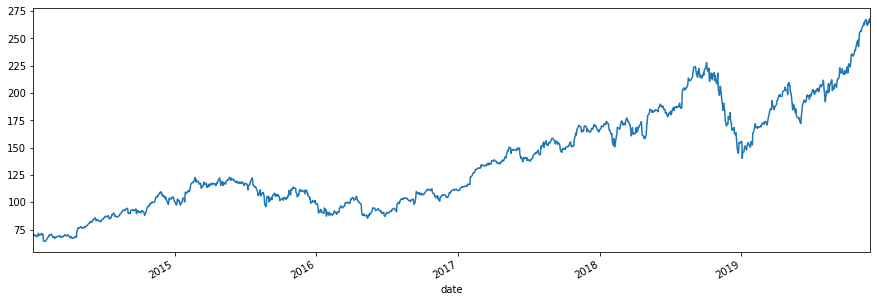

In [46]:
# Draw a line chart of close prices
aapl['adjClose'].plot(figsize=(15, 5))

**1. Check for missing values**

In [47]:
aapl.isnull().sum().sum()

0

**2. Daily Change**

- Abosolute daily change is the difference between open and close.
- Relative daily change is ratio of absolute daily change and the open price, converted to a percentage. This is especially helpful if you want to compare the daily price change in multiple stocks.

In [48]:
aapl["DailyChange"] = aapl["adjClose"] - aapl["adjOpen"]
aapl["DailyChangePercent"] = aapl["DailyChange"] / aapl["adjOpen"] * 100
aapl.head()

,symbol,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,DailyChange,DailyChangePercent
date,,,,,,,,,,,,,,,
2014-01-02,AAPL,553.1300,557.03,552.021,555.68,8381600,71.104796,71.606140,70.962234,71.432598,58671258,0.0,1.0,-0.327802,-0.458897
2014-01-03,AAPL,540.9800,553.70,540.430,552.86,14016700,69.542914,71.178069,69.472212,71.070087,98116998,0.0,1.0,-1.527173,-2.148826
2014-01-06,AAPL,543.9300,546.80,533.600,537.45,14736100,69.922137,70.291075,68.594216,69.089133,103152803,0.0,1.0,0.833003,1.205694
2014-01-07,AAPL,540.0375,545.96,537.925,544.32,11328900,69.421756,70.183093,69.150195,69.972271,79302379,0.0,1.0,-0.550515,-0.786761
2014-01-08,AAPL,543.4600,545.56,538.690,538.81,9233200,69.861718,70.131673,69.248535,69.263961,64632464,0.0,1.0,0.597757,0.863013


**3. Day-To-Day Change**

The open price does not necessarily coincide with the previous close price, possibly due to change of price expections over night. Thus it is helpful to calculate percent changes of each close price over the previous close price.

In [49]:
# get the closing price for last day
aapl["adjCloseFromYesterday"] = aapl.shift(1)["adjClose"]
aapl["dayToDayChange"] = aapl["adjClose"] - aapl["adjCloseFromYesterday"]
aapl["dayToDayPercent"] = aapl["dayToDayChange"] / aapl["adjClose"] * 100
aapl.drop(["adjCloseFromYesterday", "dayToDayChange"], axis=1, inplace=True) # inplace to drop columns
aapl.head()

,symbol,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,DailyChange,DailyChangePercent,dayToDayPercent
date,,,,,,,,,,,,,,,,
2014-01-02,AAPL,553.1300,557.03,552.021,555.68,8381600,71.104796,71.606140,70.962234,71.432598,58671258,0.0,1.0,-0.327802,-0.458897,NaN
2014-01-03,AAPL,540.9800,553.70,540.430,552.86,14016700,69.542914,71.178069,69.472212,71.070087,98116998,0.0,1.0,-1.527173,-2.148826,-2.245924
2014-01-06,AAPL,543.9300,546.80,533.600,537.45,14736100,69.922137,70.291075,68.594216,69.089133,103152803,0.0,1.0,0.833003,1.205694,0.542349
2014-01-07,AAPL,540.0375,545.96,537.925,544.32,11328900,69.421756,70.183093,69.150195,69.972271,79302379,0.0,1.0,-0.550515,-0.786761,-0.720783
2014-01-08,AAPL,543.4600,545.56,538.690,538.81,9233200,69.861718,70.131673,69.248535,69.263961,64632464,0.0,1.0,0.597757,0.863013,0.629761


In [50]:
aapl["dayToDayPercent"].idxmax()

Timestamp('2014-04-24 00:00:00')

In [51]:
aapl["dayToDayPercent"].min()

-11.062662634509346

In [52]:
aapl["dayToDayPercent"].idxmin()

Timestamp('2019-01-03 00:00:00')

**4. Monthly Performance**

For long-term investors, they may prefer monthly performance data. Create a new data frame containing adjOpen, adjHigh, adjLow, adjClose, and adjVolume for each month between 2014 and 2019.

In [53]:
# adjOpen for a month is the adjOpen of the first day of the month
aapl["Year"] = aapl.index.year
aapl["Month"] = aapl.index.month
groups = aapl.groupby(by=["Year", "Month"])
# groups.apply(lambda x: x.sort_index().first())
monthly_data = groups["adjOpen"].first()
monthly_data.head()
# for idx, group in groups:
#     print(idx)
#     print(group)
# aapl.head()
monthly_data = monthly_data.to_frame("adjOpen")
monthly_data.head()

# adjHigh of a month

# groups["adjHigh"].max()
monthly_data["adjHigh"] = groups["adjHigh"].max()

# adjLow of a month
monthly_data["adjLow"] = groups["adjLow"].min()
monthly_data.head()

# adjClose
monthly_data["adjClose"] = groups["adjClose"].last()
monthly_data.head()

# adjVolume
monthly_data["adjVolume"] = groups["adjVolume"].sum()
monthly_data.head()

adjOpen    adjHigh     adjLow   adjClose   adjVolume
Year Month                                                        
2014 1      71.432598  72.013643  63.445794  64.352070  2191490781
     2      64.610456  71.277077  64.184955  68.050670  1470093162
     3      67.686002  70.993877  67.607120  69.408476  1250425940
     4      69.540378  77.515227  66.122585  76.307426  1608766797
     5      76.554417  83.766871  75.465216  82.314342  1433918524

**5. Moving Average**

The daily price is full of random ups and downs, making it difficult to see the long-term trend. It is important to find the average performance over a fairly longer period (10 days, 30 days, etc.). A moving average (or rolling average) is a calculation that find the average price for each period of time.

In [54]:
moving_avg = aapl.rolling(30).mean()

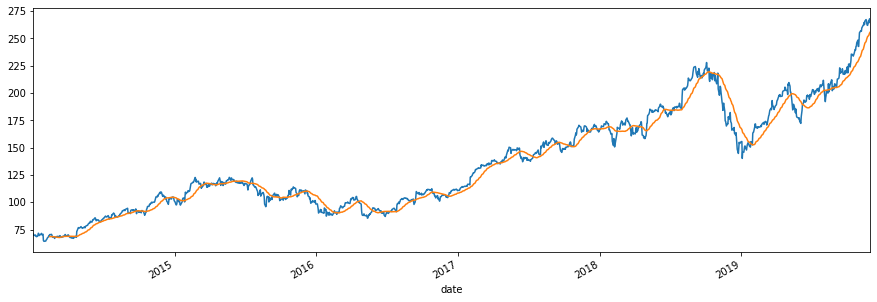

In [55]:
plt.figure(figsize=(15,5))
aapl["adjClose"].plot()
moving_avg["adjClose"].plot()

**6. Volatility**

Volatility means the risk of the stock over a period of time. It is often measured as the standard deviation of prices over each period. The higher the volatility, the risker the stock.

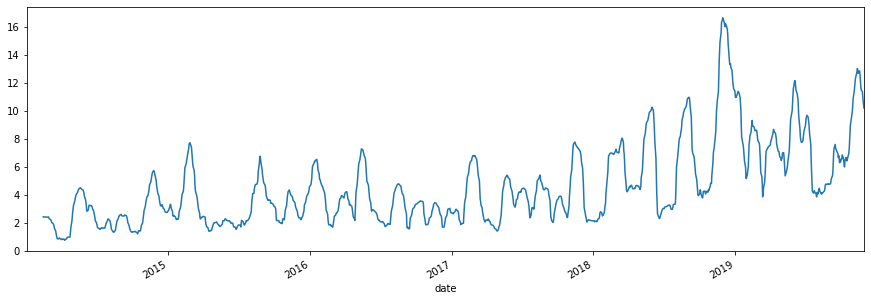

In [56]:
plt.figure(figsize=(15,5))
volatility = aapl.rolling(30).std()
volatility["adjClose"].plot()

**7. Change Points**

Changepoints occur when the price goes from increasing to decreasing or vice versa). These times are extremely important because knowing when a stock will reach a peak or is about to take off could have significant economic benefits. However, it is trickly to properly recognize changepoints, since we cannot make decisions based on future data. For simplicity, let say a day is a positive changepoint if its day-to-day change is positive, while the three previous day-to-day changes are all negative. Similarly, we recognize a day as a negative changepoint if its day-to-day change is negative, while all three previous day-to-day changes are positive.

In [57]:
aapl["ChangeYesterday"] = aapl.shift(1)["dayToDayPercent"]
aapl["changeDay-2"] = aapl.shift(2)["dayToDayPercent"]
aapl["changeDay-3"] = aapl.shift(3)["dayToDayPercent"]
aapl["PositiveChangePoint"] = (aapl["dayToDayPercent"] > 0) & (aapl["dayToDayPercent"] < 0) & (aapl[""])

In [58]:
pos_change_pts = aapl[aapl["PositiveChangePoint"]]
pos_change_pts["Temp"] = 100

In [59]:
plt.figure(figsize=(15,5))
aapl["adjClose"].plot9
plt.plot(pos_change_pts.index), pos_change_pts["adjClose"], 'r.'

**8. Prediction**

Being able to predict future stock prices is every investor's dream. While it is very challenging to do so, data analysis does help. Today let's test a basic modeling technique called linear regression.

In [60]:
plt.figure(figsize=(15,5))
data = aapl.loc["2014", ["adjClose"]]
data["adjClose"].plot()

In [61]:
data = data.reset_index()
data.head()

In [62]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()[]
model.fit(data.index).values.reshape([])